<a href="https://colab.research.google.com/github/malick08012/Mental-Health-Prediction-using-NN/blob/main/Mental_Health_Prediction_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Required Libraries



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


#Upload Data Set

In [3]:
from google.colab import files
uploaded = files.upload()  # Opens a file picker

Saving survey.csv to survey.csv


#Load the Dataset

In [4]:
# Load the dataset
df = pd.read_csv('survey.csv')
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#Choose Relevant Columns
We'll pick a subset of features useful for our task.

In [5]:
df = df[[
    'Age', 'Gender', 'family_history', 'benefits', 'care_options',
    'anonymity', 'leave', 'mental_health_consequence',
    'phys_health_consequence', 'coworkers', 'supervisor',
    'mental_health_interview', 'obs_consequence',
    'remote_work', 'tech_company', 'treatment'
]]


#Handle Missing Values

In [6]:
df = df.dropna()


# Encode Categorical Variables

In [7]:
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


#Split Features and Target

In [8]:
X = df.drop('treatment', axis=1)
y = df['treatment']


#Split into Training and Test Sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Normalize the Data

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Design a Neural Network Architecture using TensorFlow/Keras

Import TensorFlow/Keras

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


#Build the Neural Network Architecture

> Input layer matching the number of features

> Hidden layers with ReLU activation

> Output layer with sigmoid activation (binary classification)

In [12]:
# Define the model
model = Sequential([
    Dense(16, input_dim=X.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Compile the Model

In [13]:
model.compile(
    loss='binary_crossentropy',     # suitable for binary classification
    optimizer='adam',               # adaptive learning rate
    metrics=['accuracy']
)


In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

#Train the Model using Backpropagation and Evaluate It

Let’s train it for a reasonable number of epochs, say 50, with a batch size of 32.

In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5486 - loss: 0.6981 - val_accuracy: 0.5437 - val_loss: 0.6936
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6155 - loss: 0.6581 - val_accuracy: 0.5952 - val_loss: 0.6729
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6290 - loss: 0.6359 - val_accuracy: 0.6230 - val_loss: 0.6606
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6521 - loss: 0.6209 - val_accuracy: 0.6349 - val_loss: 0.6498
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6504 - loss: 0.6195 - val_accuracy: 0.6508 - val_loss: 0.6401
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6447 - loss: 0.6135 - val_accuracy: 0.6468 - val_loss: 0.6317
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6736 - loss: 0.6013 - val_accuracy: 0.6429 - val_loss: 0.6237
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7206 - loss: 0.5759 - val_accuracy: 0.6667 - val_loss

#Evaluate Accuracy and Loss Curves

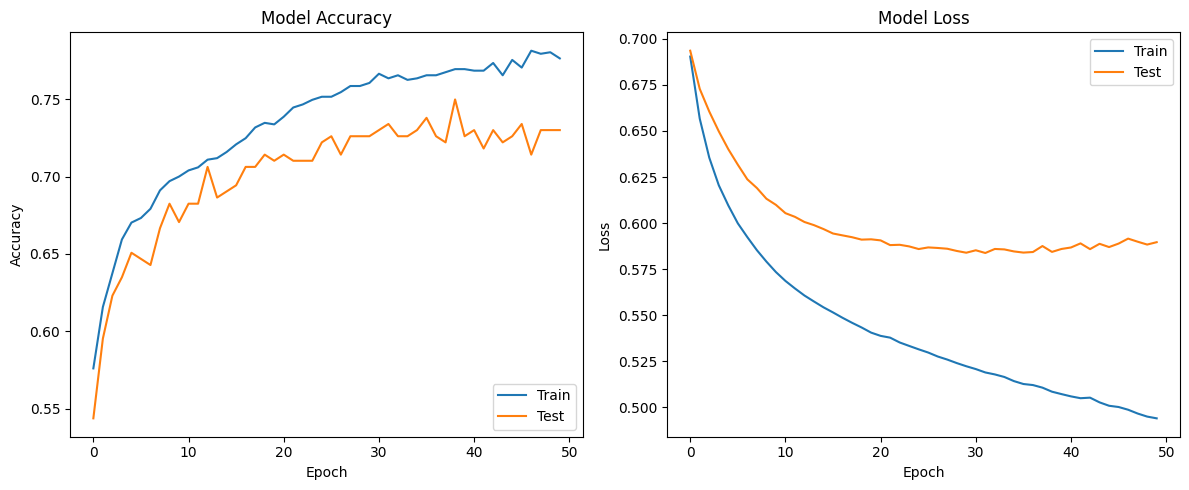

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')

plt.tight_layout()
plt.show()


#Tune Hyperparameters to Improve Performance

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam


#Rebuild and Tune the Model

In [19]:
# Build a more optimized model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # helps prevent overfitting
    layers.Dense(16, activation='relu'),
    Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile with custom learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=16,
    verbose=1
)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5394 - loss: 0.6951 - val_accuracy: 0.6071 - val_loss: 0.6620
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6085 - loss: 0.6738 - val_accuracy: 0.6389 - val_loss: 0.6471
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6462 - loss: 0.6205 - val_accuracy: 0.6706 - val_loss: 0.6316
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6420 - loss: 0.6387 - val_accuracy: 0.6746 - val_loss: 0.6216
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6598 - loss: 0.6262 - val_accuracy: 0.6905 - val_loss: 0.6177
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6735 - loss: 0.6099 - val_accuracy: 0.7024 - val_loss: 0.6138
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6953 - loss: 0.5916 - val_accuracy: 0.7024 - val_loss: 0.6098
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6999 - loss: 0.5858 - val_accuracy: 0.7063 - val_loss

#Replot the loss and accuracy curves

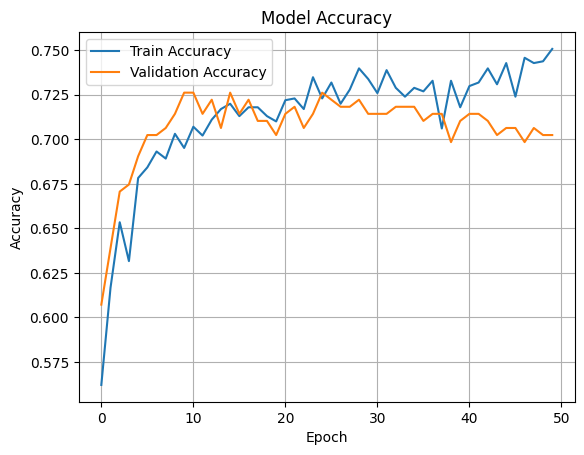

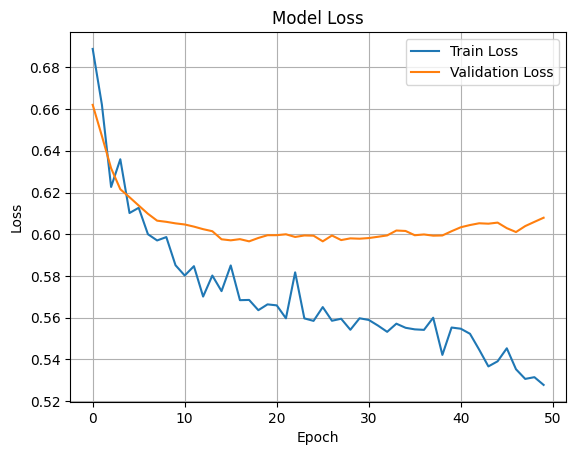

In [20]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


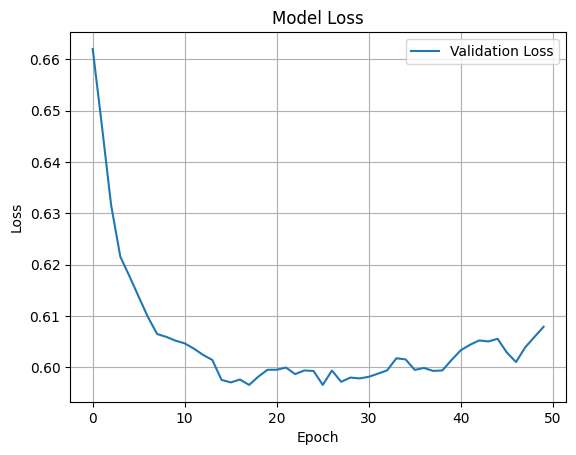

In [21]:
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [22]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {accuracy:.4f}")
print(f"Final Test Loss: {loss:.4f}")



Final Test Accuracy: 0.7024
Final Test Loss: 0.6079
